In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Input 

In [ ]:
import kagglehub

path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('creditcard.csv')
print(df.head(87))


    Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
..   ...       ...       ...       ...       ...       ...       ...   
82  52.0 -3.005237  2.600138  1.483691 -2.418473  0.306326 -0.824575   
83  53.0 -1.198968 -1.474100  1.840326 -4.515824  0.327567 -0.174469   
84  54.0  1.202398  0.321711  0.281211  0.643689 -0.148669 -0.589739   
85  55.0 -4.575093 -4.429184  3.402585  0.903915  3.002224 -0.491078   
86  55.0 -0.773450  0.853112  0.818254 -0.236070  0.803463 -1.438728   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277

In [ ]:
df.head(87)  


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
83,53.0,-1.198968,-1.474100,1.840326,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,...,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
84,54.0,1.202398,0.321711,0.281211,0.643689,-0.148669,-0.589739,0.048413,-0.093361,-0.042934,...,-0.251113,-0.680155,0.148163,0.047062,0.157050,0.121935,-0.004608,0.029418,7.53,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,...,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0


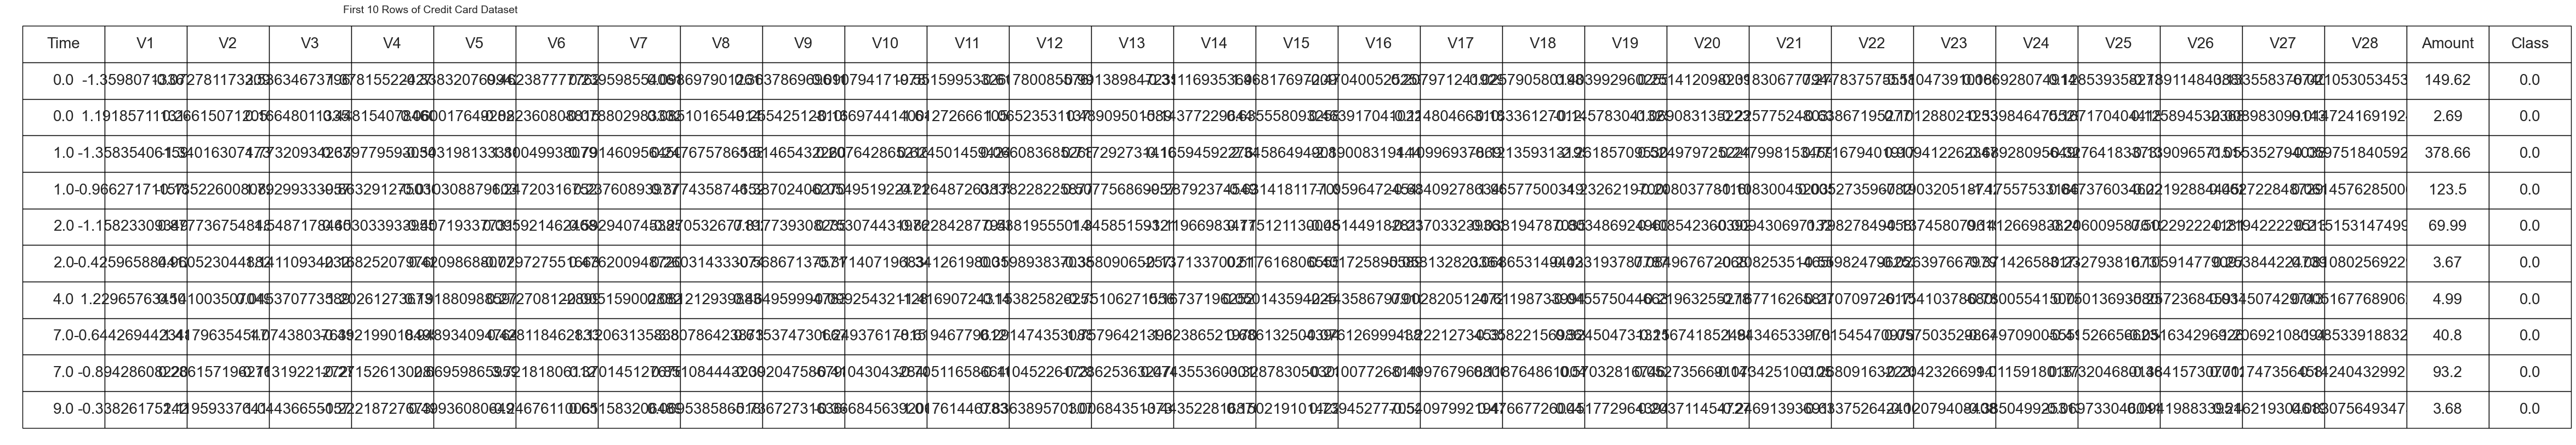

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('creditcard.csv')

df_sample = df.head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(20, 10))
table = plt.table(cellText=df_sample.values, 
                  colLabels=df_sample.columns, 
                  cellLoc='center', 
                  loc='upper left')
table.auto_set_font_size(False)
table.set_fontsize(20)
table.scale(3, 4)

plt.axis("off")
plt.title("First 10 Rows of Credit Card Dataset", fontsize=14)
plt.show()


In [ ]:
#train and test data for model 
X = df.drop(columns=['Class'])

y = df['Class']

# Split into training & testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df = pd.read_csv('creditcard.csv')
features = df.drop(columns=['Class']) 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)
df['PCA1'] = features_reduced[:, 0]
df['PCA2'] = features_reduced[:, 1]


In [13]:
X = df[['PCA1', 'PCA2']].values
y = df['Class'].values
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [14]:
X_cnn = X_res.reshape(X_res.shape[0], X_res.shape[1], 1)
X_lstm = X_res.reshape(X_res.shape[0], 1, X_res.shape[1])

In [ ]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_res, test_size=0.2, random_state=42)


In [ ]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_res, test_size=0.2, random_state=42)

cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),  
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [21]:
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, validation_data=(X_test_cnn, y_test_cnn))


Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.6851 - loss: 0.5956 - val_accuracy: 0.7241 - val_loss: 0.5537
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.7243 - loss: 0.5475 - val_accuracy: 0.7305 - val_loss: 0.5347
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.7300 - loss: 0.5353 - val_accuracy: 0.7359 - val_loss: 0.5273
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7339 - loss: 0.5300 - val_accuracy: 0.7383 - val_loss: 0.5267
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7380 - loss: 0.5253 - val_accuracy: 0.7377 - val_loss: 0.5205
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7394 - loss: 0.5211 - val_accuracy: 0.7439 - val_loss: 0.5202
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.7416 - loss: 0.5205 - val_accuracy: 0.7435 - val_loss: 0.5168
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 

In [ ]:
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_class_cnn = (y_pred_cnn > 0.5).astype(int)
print("CNN Model Evaluation")
print(classification_report(y_test_cnn, y_pred_class_cnn))

In [ ]:
conf_matrix_cnn = confusion_matrix(y_test_cnn, y_pred_class_cnn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='coolwarm')
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN ROC curve (area = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [25]:
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_res, test_size=0.3, random_state=42)


In [26]:
lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),  
    LSTM(50),
    Dense(1, activation='sigmoid')
])

In [27]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.6443 - loss: 0.6312 - val_accuracy: 0.7039 - val_loss: 0.5791
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7064 - loss: 0.5752 - val_accuracy: 0.7182 - val_loss: 0.5650
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.7171 - loss: 0.5636 - val_accuracy: 0.7200 - val_loss: 0.5578
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.7190 - loss: 0.5560 - val_accuracy: 0.7215 - val_loss: 0.5537
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7195 - loss: 0.5528 - val_accuracy: 0.7226 - val_loss: 0.5519
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7198 - loss: 0.5514 - val_accuracy: 0.7201 - val_loss: 0.5492
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.7210 - loss: 0.5487 - val_accuracy: 0.7218 - val_loss: 0.5478
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 

In [ ]:
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_class_lstm = (y_pred_lstm > 0.5).astype(int)
print("\nLSTM Model Evaluation")
print(classification_report(y_test_lstm, y_pred_class_lstm))

In [ ]:
conf_matrix_lstm = confusion_matrix(y_test_lstm, y_pred_class_lstm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='coolwarm')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm, y_pred_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lstm, tpr_lstm, color='green', lw=2, label=f'LSTM ROC curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve')
plt.legend(loc="lower right")
plt.show()




In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='coolwarm', ax=axes[0])
axes[0].set_title('CNN Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='coolwarm', ax=axes[1])
axes[1].set_title('LSTM Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN ROC (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='green', lw=2, label=f'LSTM ROC (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN vs LSTM ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print("CNN Classification Report:")
print(classification_report(y_test_cnn, y_pred_class_cnn))

print("\nLSTM Classification Report:")
print(classification_report(y_test_lstm, y_pred_class_lstm))


      Metric  CNN Model  LSTM Model
0  Precision   0.752533    0.722333
1     Recall   0.752381    0.722333
2   F1-Score   0.752336    0.722331


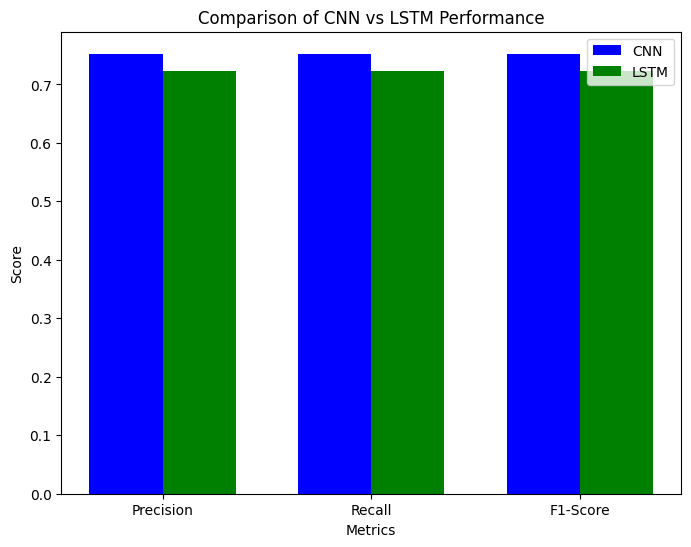

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
metrics = ["Precision", "Recall", "F1-Score"]

cnn_values = [
    cnn_report["weighted avg"]["precision"],
    cnn_report["weighted avg"]["recall"],
    cnn_report["weighted avg"]["f1-score"]
]

lstm_values = [
    lstm_report["weighted avg"]["precision"],
    lstm_report["weighted avg"]["recall"],
    lstm_report["weighted avg"]["f1-score"]
]

df_comparison = pd.DataFrame({
    "Metric": metrics,
    "CNN Model": cnn_values,
    "LSTM Model": lstm_values
})

print(df_comparison)

x = np.arange(len(metrics))
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, cnn_values, width, label="CNN", color="blue")
ax.bar(x + width/2, lstm_values, width, label="LSTM", color="green")

# Labeling
ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of CNN vs LSTM Performance")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()


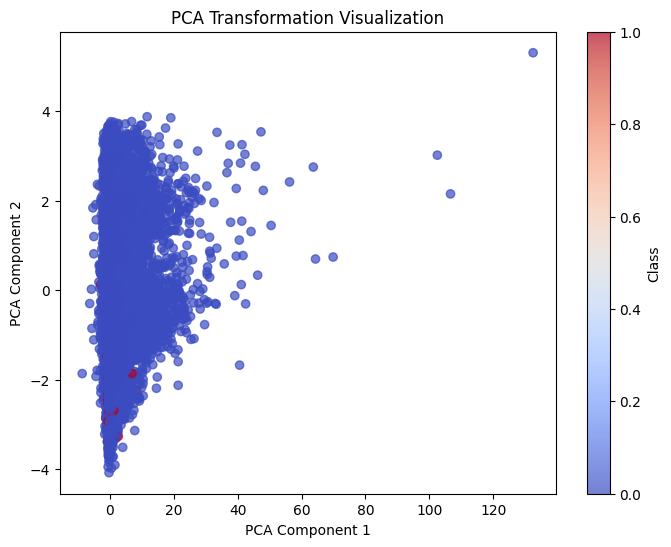

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=y, cmap="coolwarm", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Transformation Visualization")
plt.colorbar(label="Class")
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)


In [ ]:
df = pd.read_csv('creditcard.csv')
X = df.drop(columns=['Class'])
y = df['Class']

smote = SMOTE()
X_bal, y_bal = smote.fit_resample(X, y)

In [16]:
scaler = MinMaxScaler()
X_bal_scaled = scaler.fit_transform(X_bal)

In [17]:
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_bal_scaled, y_bal, test_size=0.3, random_state=42)


In [19]:
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cnn), callbacks=[early_stopping])

Epoch 1/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.9547 - loss: 0.1335 - val_accuracy: 0.9820 - val_loss: 0.0541
Epoch 2/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9808 - loss: 0.0579 - val_accuracy: 0.9853 - val_loss: 0.0406
Epoch 3/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9842 - loss: 0.0467 - val_accuracy: 0.9869 - val_loss: 0.0352
Epoch 4/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.9850 - loss: 0.0426 - val_accuracy: 0.9840 - val_loss: 0.0385
Epoch 5/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 56s 4ms/step - accuracy: 0.9861 - loss: 0.0397 - val_accuracy: 0.9899 - val_loss: 0.0291
Epoch 6/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9867 - loss: 0.0375 - val_accuracy: 0.9913 - val_loss: 0.0281
Epoch 7/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9876 - loss: 0.0350 - val_accuracy: 0.9904 - val_loss: 0.0261
Epoch 8/10
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('creditcard.csv')

X = df.drop(columns=['Class'])
y = df['Class']

scaler = MinMaxScaler()
X_bal_scaled = scaler.fit_transform(X)

X_lstm_bal = X_bal_scaled.reshape(-1, X_bal_scaled.shape[1], 1)

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm_bal, y, test_size=0.3, random_state=42)

lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(30),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping])


Epoch 1/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 151s 23ms/step - accuracy: 0.9983 - loss: 0.0205 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 2/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 148s 24ms/step - accuracy: 0.9981 - loss: 0.0137 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 3/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 195s 23ms/step - accuracy: 0.9985 - loss: 0.0116 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 4/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 137s 22ms/step - accuracy: 0.9982 - loss: 0.0134 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 5/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 141s 22ms/step - accuracy: 0.9982 - loss: 0.0135 - val_accuracy: 0.9984 - val_loss: 0.0118
Epoch 6/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 136s 22ms/step - accuracy: 0.9981 - loss: 0.0138 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 7/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 142s 22ms/step - accuracy: 0.9984 - loss: 0.0121 - val_accuracy: 0.9984 - val_loss: 0.0119
Epoch 8/10
6231/6231 ━━━━━━━━━━━━━━━━━━━━ 136s 22ms/step - accuracy: 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)

plt.figure(figsize=(5,5))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - CNN")
plt.show()

print("CNN Model Classification Report:")
print(classification_report(y_test_cnn, y_pred_cnn))


In [ ]:
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)

plt.figure(figsize=(5,5))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - LSTM")
plt.show()

print("LSTM Model Classification Report:")
print(classification_report(y_test_lstm, y_pred_lstm))


In [ ]:
cnn_model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test), class_weight=class_weight_dict, callbacks=[early_stopping])


Epoch 1/5
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 57s 4ms/step - accuracy: 0.9573 - loss: 0.1244 - val_accuracy: 0.9808 - val_loss: 0.0535
Epoch 2/5
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9813 - loss: 0.0552 - val_accuracy: 0.9858 - val_loss: 0.0405
Epoch 3/5
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 81s 4ms/step - accuracy: 0.9841 - loss: 0.0455 - val_accuracy: 0.9861 - val_loss: 0.0372
Epoch 4/5
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - accuracy: 0.9861 - loss: 0.0399 - val_accuracy: 0.9890 - val_loss: 0.0314
Epoch 5/5
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9869 - loss: 0.0367 - val_accuracy: 0.9879 - val_loss: 0.0309


In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.7).astype("int32")

cm_cnn = confusion_matrix(y_test_cnn, y_pred_cnn)

plt.figure(figsize=(5,5))
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - CNN")
plt.show()
print("CNN Model Classification Report:")
print(classification_report(y_test_cnn, y_pred_cnn))


In [ ]:
X_train_lstm, X_test_lstm = X_train.reshape(-1, X_train.shape[1], 1), X_test.reshape(-1, X_test.shape[1], 1)

lstm_model = Sequential([
    Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    LSTM(50, return_sequences=True),
    LSTM(30),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train_lstm, y_train, epochs=5, batch_size=32, validation_data=(X_test_lstm, y_test), class_weight=class_weight_dict, callbacks=[early_stopping])

y_pred_lstm_probs = lstm_model.predict(X_test_lstm).flatten()
y_pred_lstm = (y_pred_lstm_probs > 0.6).astype("int32")[:len(y_test)]  # اطمینان از تطابق اندازه


cm_lstm = confusion_matrix(y_test, y_pred_lstm)


plt.figure(figsize=(5,5))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - LSTM")
plt.show()

print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm))


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_lstm_probs = lstm_model.predict(X_test_lstm).flatten()

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm_probs)
auc_lstm = auc(fpr_lstm, tpr_lstm)

plt.figure(figsize=(8,6))
plt.plot(fpr_lstm, tpr_lstm, label=f'LSTM Model (AUC = {auc_lstm:.4f})', color='orange')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - LSTM Fraud Detection')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_cnn_probs = cnn_model.predict(X_test_cnn).flatten()

fpr_cnn, tpr_cnn, _ = roc_curve(y_test_cnn, y_pred_cnn_probs)
auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure(figsize=(8,6))
plt.plot(fpr_cnn, tpr_cnn, label=f'CNN Model (AUC = {auc_cnn:.4f})', color='blue')

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - CNN Fraud Detection')
plt.legend()
plt.grid()
plt.show()
